In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import plotly.express as px

In [ ]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='mypass123',
    database='footlocker_db'
)

In [3]:
# Query the table and load it into a DataFrame
query = "SELECT * FROM retail_data_updated"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
df.head()

C:\Users\mhmja\AppData\Local\Temp\ipykernel_18464\1683474844.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,order_id,product_id,category,region,sales_amount,quantity,customer_age,customer_gender,order_date
0,1,1016,Home Goods,North,1960.68,4,22,Non-Binary,2024-05-21
1,2,1046,Electronics,West,410.05,1,25,Male,2024-04-18
2,3,1075,Accessories,South,2409.45,5,34,Non-Binary,2024-03-25
3,4,1176,Home Goods,South,2355.03,9,28,Female,2024-01-15
4,5,1152,Electronics,North,2073.42,6,30,Female,2024-05-22


In [4]:
print(df.isnull().sum())

order_id           0
product_id         0
category           0
region             0
sales_amount       0
quantity           0
customer_age       0
customer_gender    0
order_date         0
dtype: int64


In [5]:
# Analyze sales by region
region_sales = df.groupby('region')['sales_amount'].sum().reset_index()
region_sales

,region,sales_amount
0,East,698536.15
1,North,762595.13
2,South,659717.84
3,West,721650.02


In [6]:
# Analyze customer demographics
demographics = df.groupby('customer_gender').agg(avg_age=('customer_age', 'mean'), total_sales=('sales_amount', 'sum')).reset_index()
demographics

,customer_gender,avg_age,total_sales
0,Female,44.289318,988222.51
1,Male,43.705263,935076.28
2,Non-Binary,43.942511,919200.35


### Visualizations ###

C:\Users\mhmja\AppData\Local\Temp\ipykernel_18464\4009055661.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='sales_amount', data=df, estimator=sum, ci=None)


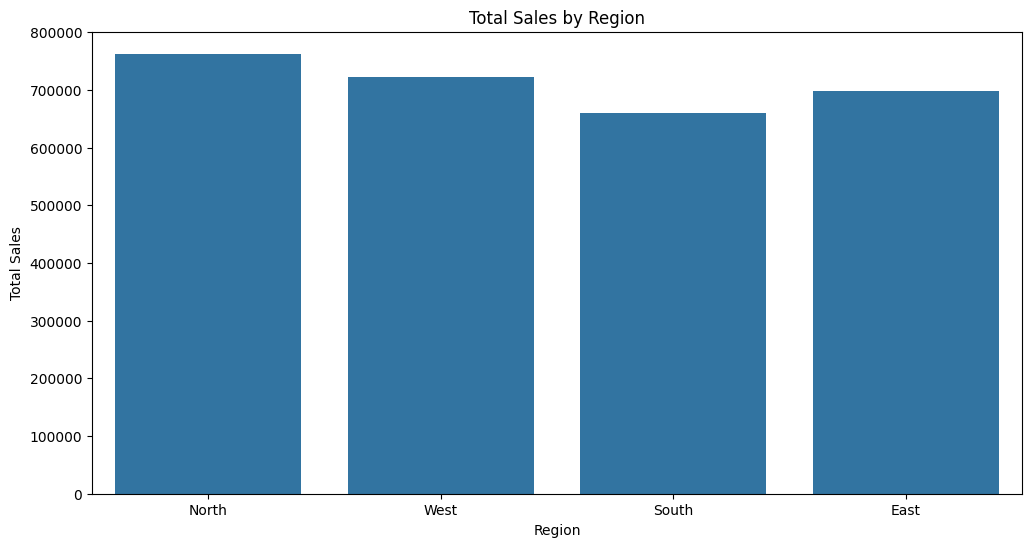

In [7]:
# Sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='sales_amount', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

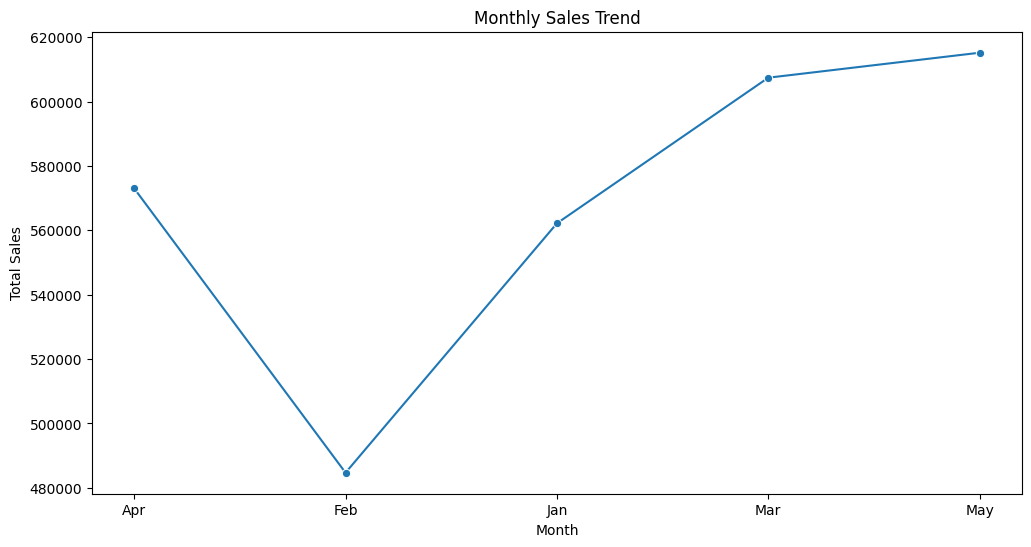

In [8]:
# Sales Trends Over Time
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.strftime('%b')

monthly_sales = df.groupby('order_month')['sales_amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='order_month', y='sales_amount', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month') 
plt.ylabel('Total Sales')
plt.show()

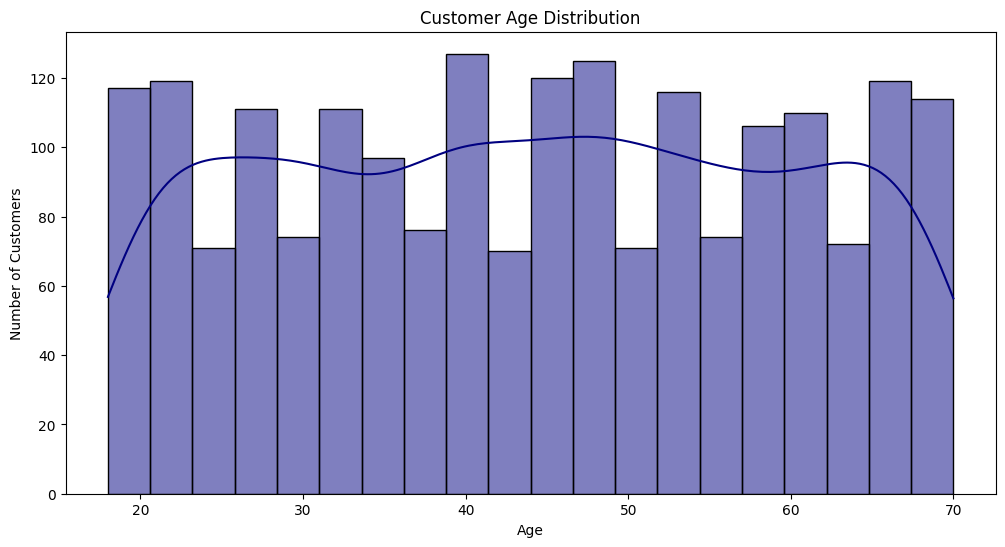

In [9]:
# Cutomer Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['customer_age'], bins=20, kde=True, color=(0, 0, 0.5, 0.5))
plt.title('Customer Age Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Age')
plt.show()

C:\Users\mhmja\AppData\Local\Temp\ipykernel_18464\2718742675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales_amount', data=category_sales, estimator=sum, palette='viridis')


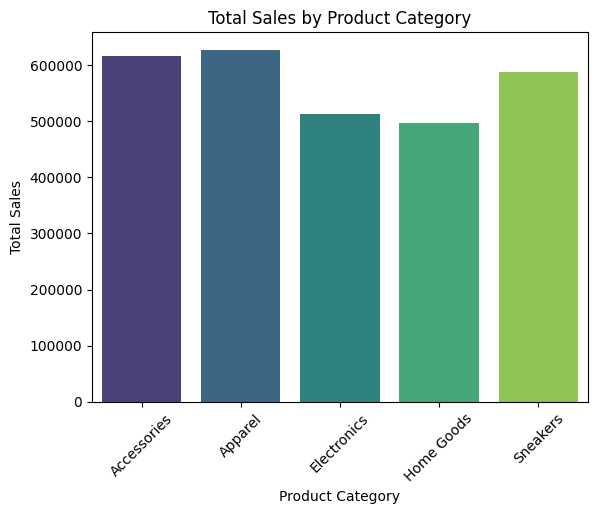

In [10]:
# Sales by product category
category_sales = df.groupby('category')['sales_amount'].sum().reset_index()
sns.barplot(x='category', y='sales_amount', data=category_sales, estimator=sum, palette='viridis')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

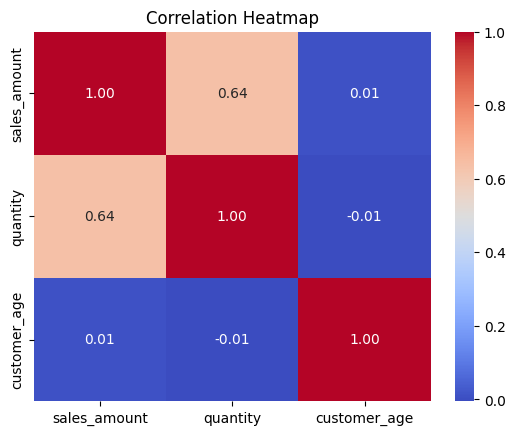

In [11]:
# Correlation Heatmap
corr = df[['sales_amount', 'quantity', 'customer_age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

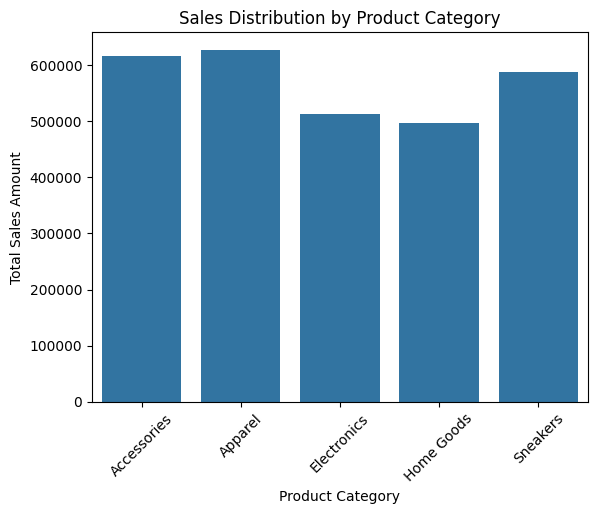

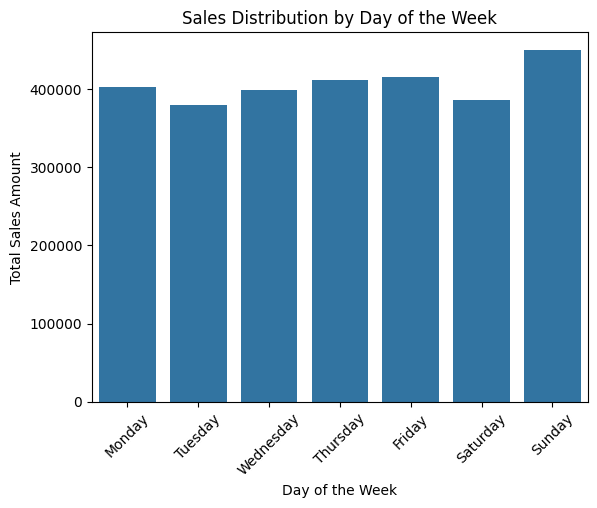

In [ ]:
# Sales Distribution by Day of the Week
df['order_date'] = pd.to_datetime(df['order_date'])
df['day_of_week'] = df['order_date'].dt.day_name()
day_sales = df.groupby('day_of_week')['sales_amount'].sum().reindex(['Monday', 
                                                                     'Tuesday', 
                                                                     'Wednesday', 
                                                                     'Thursday', 
                                                                     'Friday', 
                                                                     'Saturday', 
                                                                     'Sunday']).reset_index()

sns.barplot(x='day_of_week', y='sales_amount', data=day_sales)
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

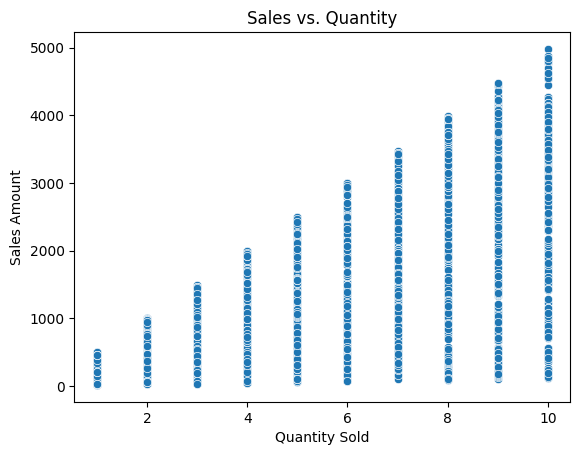

In [23]:
# Sales vs. Quantity Scatter Plot
sns.scatterplot(x='quantity', y='sales_amount', data=df)
plt.title('Sales vs. Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount')
plt.show()

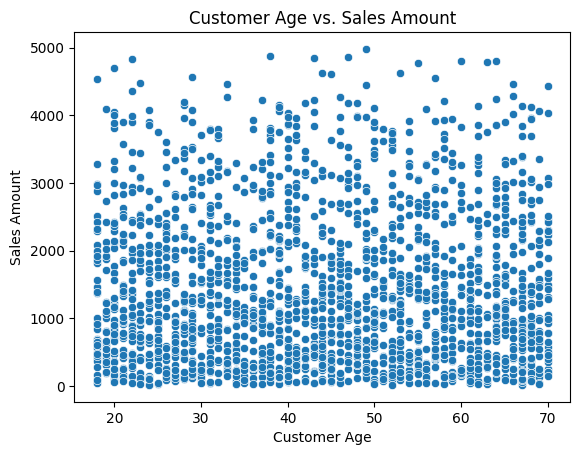

In [24]:
# Customer Age vs. Sales Amount
sns.scatterplot(x='customer_age', y='sales_amount', data=df)
plt.title('Customer Age vs. Sales Amount')
plt.xlabel('Customer Age')
plt.ylabel('Sales Amount')
plt.show()

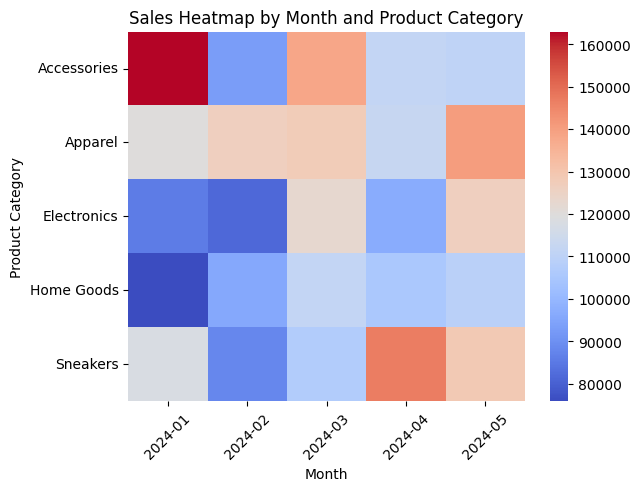

In [27]:
# Sales Heatmap by Month and Product Category
df['month'] = df['order_date'].dt.to_period('M')
category_month_sales = df.pivot_table(index='category', columns='month', values='sales_amount', aggfunc='sum')
sns.heatmap(category_month_sales, cmap='coolwarm')
plt.title('Sales Heatmap by Month and Product Category')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()